In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt

In [21]:
# 2.2. Fixed Income or Bonds

# 2.2.1. U.S. Total Bond Market
# 2.2.2. U.S. Short Term Bond Market
# 2.2.3. U.S. Long Term Bond Market
# 2.2.4. International Total Bond Market

# Data Query and Range Delimiting
bondsquery = web.DataReader(['AGG', 'AUBAX', 'SHY', 'TLT'], 'yahoo', '2006-04-01', '2016-05-01')
cbonds = bondsquery['Close']
mbondsall = cbonds.asfreq('M', method='pad')
mbondsall.columns = ['mbonds', 'mibonds', 'mshort', 'mlong']


In [22]:
# Monthly and Annual Returns Calculation
mbondsall.loc[:, 'mbondsret'] = mbondsall.loc[:, 'mbonds'] / mbondsall.loc[:, 'mbonds'].shift(1) - 1
mbondsall.loc[:, 'abondsret'] = mbondsall.loc[:, 'mbonds'] / mbondsall.loc[:, 'mbonds'].shift(12) - 1

mbondsall.loc[:, 'mshortret'] = mbondsall.loc[:, 'mshort'] / mbondsall.loc[:, 'mshort'].shift(1) - 1
mbondsall.loc[:, 'ashortret'] = mbondsall.loc[:, 'mshort'] / mbondsall.loc[:, 'mshort'].shift(12) - 1

mbondsall.loc[:, 'mlongret'] = mbondsall.loc[:, 'mlong'] / mbondsall.loc[:, 'mlong'].shift(1) - 1
mbondsall.loc[:, 'alongret'] = mbondsall.loc[:, 'mlong'] / mbondsall.loc[:, 'mlong'].shift(12) - 1

mbondsall.loc[:, 'mibondsret'] = mbondsall.loc[:, 'mibonds'] / mbondsall.loc[:, 'mibonds'].shift(1) - 1
mbondsall.loc[:, 'aibondsret'] = mbondsall.loc[:, 'mibonds'] / mbondsall.loc[:, 'mibonds'].shift(12) - 1

In [23]:
# Cumulative Monthly Returns Calculation
mbondsall.loc[:, 'mbondscum'] = np.cumprod(mbondsall.loc[:, 'mbondsret'] + 1) - 1
mbondsall.loc[:, 'mshortcum'] = np.cumprod(mbondsall.loc[:, 'mshortret'] + 1) - 1
mbondsall.loc[:, 'mlongcum'] = np.cumprod(mbondsall.loc[:, 'mlongret'] + 1) - 1
mbondsall.loc[:, 'mibondscum'] = np.cumprod(mbondsall.loc[:, 'mibondsret'] + 1) - 1

In [24]:
# Annualized Monthly Returns Calculation
mbondsall.loc[:, 'mbondscuma'] = np.cumprod(mbondsall.loc[:, 'mbondsret'] + 1) ** (12 / len(mbondsall)) - 1
mbondsall.loc[:, 'mshortcuma'] = np.cumprod(mbondsall.loc[:, 'mshortret'] + 1) ** (12 / len(mbondsall)) - 1
mbondsall.loc[:, 'mlongcuma'] = np.cumprod(mbondsall.loc[:, 'mlongret'] + 1) ** (12 / len(mbondsall)) - 1
mbondsall.loc[:, 'mibondscuma'] = np.cumprod(mbondsall.loc[:, 'mibondsret'] + 1) ** (12 / len(mbondsall)) - 1

In [25]:
# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 3, 31)
mbondsreta = mbondsall.at[lastdate, 'mbondscuma']
mshortreta = mbondsall.at[lastdate, 'mshortcuma']
mlongreta = mbondsall.at[lastdate, 'mlongcuma']
mibondsreta = mbondsall.at[lastdate, 'mibondscuma']

In [26]:
# Annualized Monthly Standard Deviation Calculation
mbondsstdeva = np.std(mbondsall.loc[:, 'mbondsret']) * np.sqrt(12)
mshortstdeva = np.std(mbondsall.loc[:, 'mshortret']) * np.sqrt(12)
mlongstdeva = np.std(mbondsall.loc[:, 'mlongret']) * np.sqrt(12)
mibondsstdeva = np.std(mbondsall.loc[:, 'mibondsret']) * np.sqrt(12)


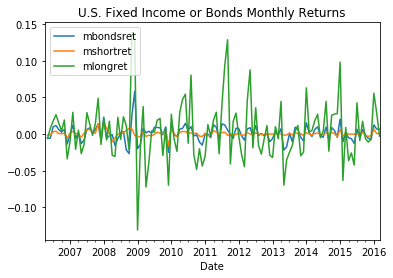

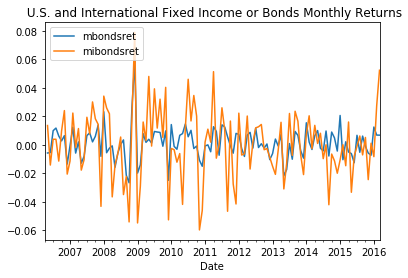

In [27]:
# Monthly Returns Chart
mbondsall.plot(y=['mbondsret', 'mshortret', 'mlongret'])
plt.title('U.S. Fixed Income or Bonds Monthly Returns')
plt.legend(loc='upper left')
plt.show()

mbondsall.plot(y=['mbondsret', 'mibondsret'])
plt.title(' U.S. and International Fixed Income or Bonds Monthly Returns')
plt.legend(loc='upper left')
plt.show()


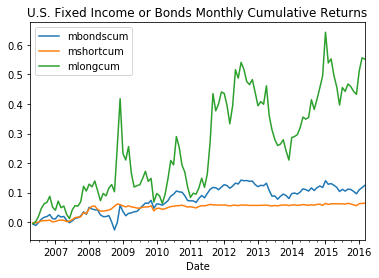

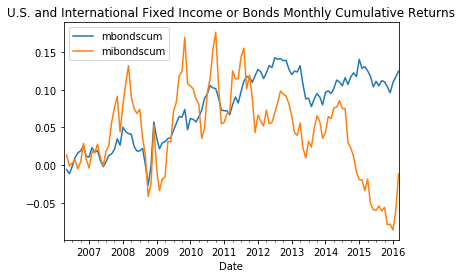

In [28]:
# Cumulative Monthly Returns Chart
mbondsall.plot(y=['mbondscum', 'mshortcum', 'mlongcum'])
plt.title('U.S. Fixed Income or Bonds Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

mbondsall.plot(y=['mbondscum', 'mibondscum'])
plt.title('U.S. and International Fixed Income or Bonds Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

In [29]:
# Annualized Monthly Return and Standard Deviation Table
bondsdata = [{'0': '', '1': 'mbondsret', '2': 'mshortret', '3': 'mlongret', '4': 'mibondsret'},
        {'0': 'Annualized Return', '1': mbondsreta, '2': mshortreta, '3': mlongreta, '4': mibondsreta},
        {'0': 'Annualized Standard Deviation', '1': mbondsstdeva, '2': mshortstdeva, '3': mlongstdeva,
         '4': mibondsstdeva}]
bondstable = pd.DataFrame(bondsdata)
print(bondstable)

                               0          1           2          3           4
0                                 mbondsret   mshortret   mlongret  mibondsret
1              Annualized Return  0.0118126  0.00624223  0.0449297   -0.001161
2  Annualized Standard Deviation  0.0381976   0.0130565   0.139457   0.0843097
